# 1. Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_df = pd.read_csv('imdb_top_1000.csv')
movies_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Dropping unnecessary columns

In [8]:
# Drop irrelevant columns
movies_df = movies_df.drop(columns = ['Poster_Link', 'Overview'])
movies_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Checking the shape of the dataset

In [10]:
movies_df.shape

(1000, 14)

## Checking the datatypes

In [12]:
movies_df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

## Checking for Null Values

In [14]:
movies_df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [16]:
#remove null values
# Fill missing values for categorical columns
movies_df['Certificate'] = movies_df['Certificate'].fillna(movies_df['Certificate'].mode()[0])
# Fill missing values for numerical columns
movies_df['Meta_score'] = movies_df['Meta_score'].fillna(movies_df['Meta_score'].mean())
# Converting Runtime column to int
movies_df['Runtime'] = movies_df['Runtime'].str.replace('min', '').astype('int')
# Converting Gross column to float
movies_df['Gross'] = movies_df['Gross'].str.replace(',', '').astype('float')
# Check distinct Release_Year
movies_df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [26]:
# Remove the row with PG as year
movies_df = movies_df[movies_df['Released_Year'] != 'PG']

In [28]:
# Convert Release_Year from object
movies_df['Released_Year'] = pd.to_datetime(movies_df['Released_Year']).dt.year

In [30]:
#new datatypes
movies_df.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

## Checking for duplicates

In [34]:
duplicates = movies_df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 999, dtype: bool

# 2. Exploratory Data Analysis

## Statistical Summary

In [38]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,999.0,1.991217e+03,2.329702e+01,1920.0,1976.0,1.999000e+03,2009.00,2020.0
Runtime,999.0,1.228739e+02,2.810252e+01,45.0,103.0,1.190000e+02,137.00,321.0
IMDB_Rating,999.0,7.949650e+00,2.754071e-01,7.6,7.7,7.900000e+00,8.10,9.3
Meta_score,999.0,7.797250e+01,1.136771e+01,28.0,72.0,7.797153e+01,85.50,100.0
No_of_Votes,999.0,2.736974e+05,3.275366e+05,25088.0,55471.5,1.383560e+05,374477.50,2343110.0
Gross,830.0,6.790728e+07,1.097546e+08,1305.0,3245338.5,2.345744e+07,80103240.75,936662225.0


## Exploring Movie Genres

We analyze the distribution of movie genres to understand which genres are most common or trending.

In [44]:
# check the unique genres

# Split the genre column into a list of genres
split_genres = movies_df['Genre'].str.split(',')

# Flatten the list of list into a single list of genres
all_genres = [genre.strip() for sublist in split_genres for genre in sublist]

# Get unique genres
unique_genres = set(all_genres)

# Convert the set back into a list
unique_genres = list(unique_genres)
print(unique_genres)

['Crime', 'Music', 'Fantasy', 'Romance', 'Thriller', 'Sport', 'Horror', 'War', 'Film-Noir', 'Mystery', 'Western', 'Action', 'Drama', 'Musical', 'Family', 'Adventure', 'Comedy', 'Biography', 'History', 'Animation', 'Sci-Fi']


In [50]:
# Movie count per genre
genre_counts = pd.Series(all_genres).value_counts()

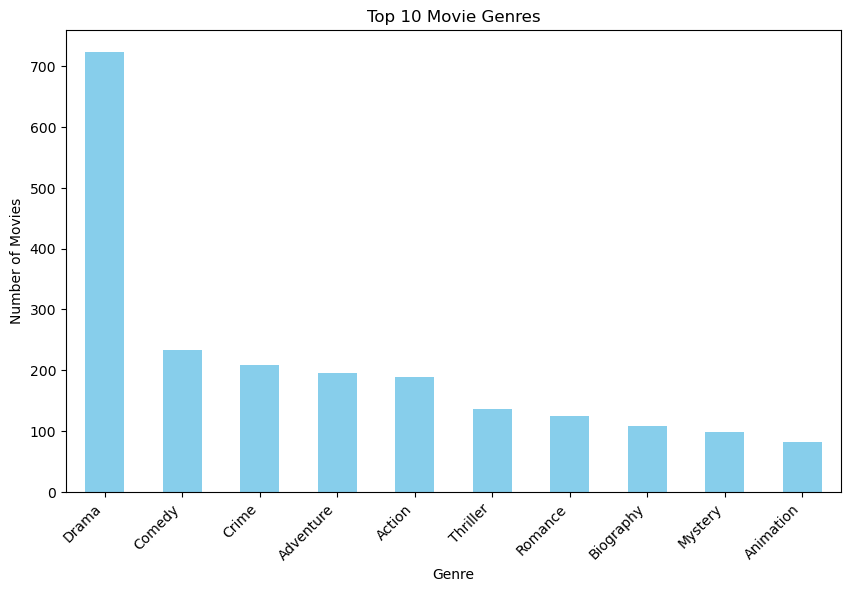

In [52]:
#Visualizing the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')  # Show only top 10 genres
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

## Analyzing the Ratings Distribution
We now figure out how ratings are distributed can help identify trends or patterns in audience preferences.

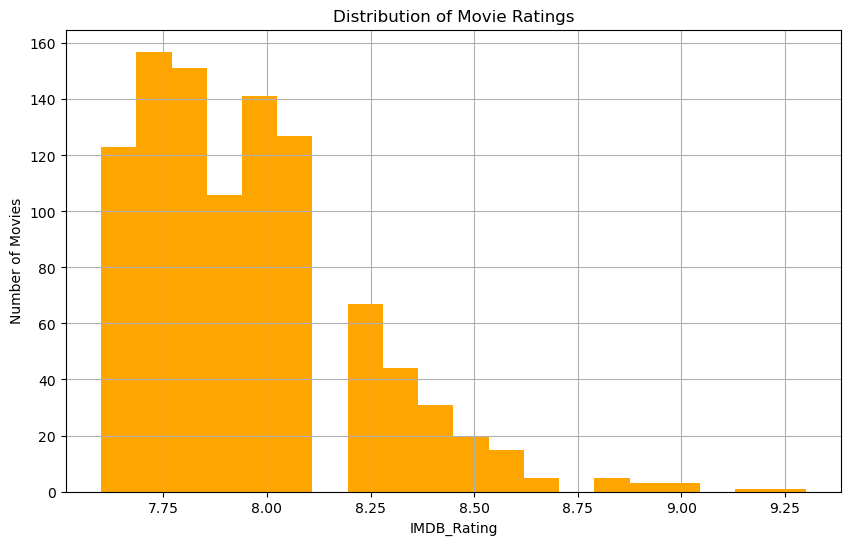

In [77]:
plt.figure(figsize=(10, 6))
movies_df['IMDB_Rating'].hist(bins=20, color='orange')
plt.title('Distribution of Movie Ratings')
plt.xlabel('IMDB_Rating')
plt.ylabel('Number of Movies')
plt.show()


## Analyzing the Popularity of Directors
 We can analyze which directors have directed the most movies or have the highest average ratings to explore the popularity of directors.

In [23]:
#Counting the number of movies per director
director_counts = movies_df['Director'].value_counts()

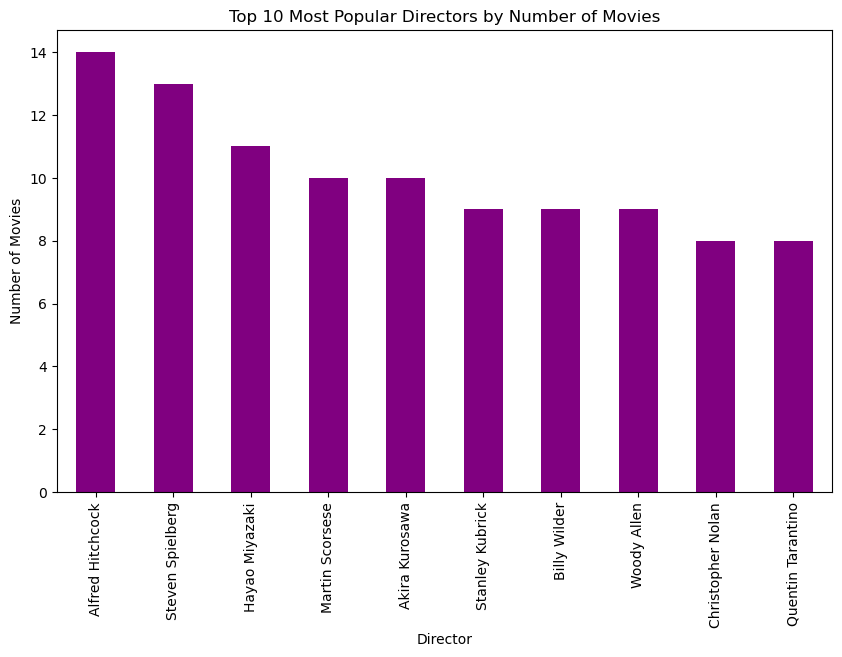

In [25]:
#Visualizing the top 10 most popular directors
plt.figure(figsize=(10, 6))
director_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Most Popular Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

In [62]:
#Directors with the Highest Average Rating
director_avg_ratings = movies_df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)
director_avg_ratings

Director
Frank Darabont     8.95
Irvin Kershner     8.70
Lana Wachowski     8.70
George Lucas       8.60
Roberto Benigni    8.60
                   ... 
Neil Burger        7.60
Ted Demme          7.60
Eric Bress         7.60
Bennett Miller     7.60
Mary Harron        7.60
Name: IMDB_Rating, Length: 548, dtype: float64

## Certificate Analysis

In [68]:
# Display unique certificate
movies_df["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

### Analyzing by Gross

In [70]:
# Group by Certificate
certificate_gross = movies_df.groupby("Certificate").mean(numeric_only = True)['Gross'].sort_values(ascending = True)

# Convert the series to a df
certificate_gross_df = certificate_gross.reset_index()

# Drop nulls
certificate_gross_df = certificate_gross_df.dropna()

# Format the Gross column for readability
certificate_gross_df["Gross"] = certificate_gross_df["Gross"].apply(lambda x: f"{x: ,.2f}")

# Display the df
certificate_gross_df

,Certificate,Gross
0,TV-PG,"106,662.00"
1,Unrated,"300,000.00"
2,GP,"708,958.00"
3,Passed,"5,435,553.74"
4,Approved,"6,949,014.00"
5,PG,"17,888,273.29"
6,R,"25,793,599.39"
7,U/A,"26,020,957.00"
8,PG-13,"36,947,857.08"
9,G,"49,596,325.70"


## Exploring Release Year Patterns
Analyzing the release year can reveal trends such as periods of high movie production or popular release times

In [64]:
#Counting the Number of Movies Released Per Year
release_year_counts = movies_df['Released_Year'].value_counts().sort_index()

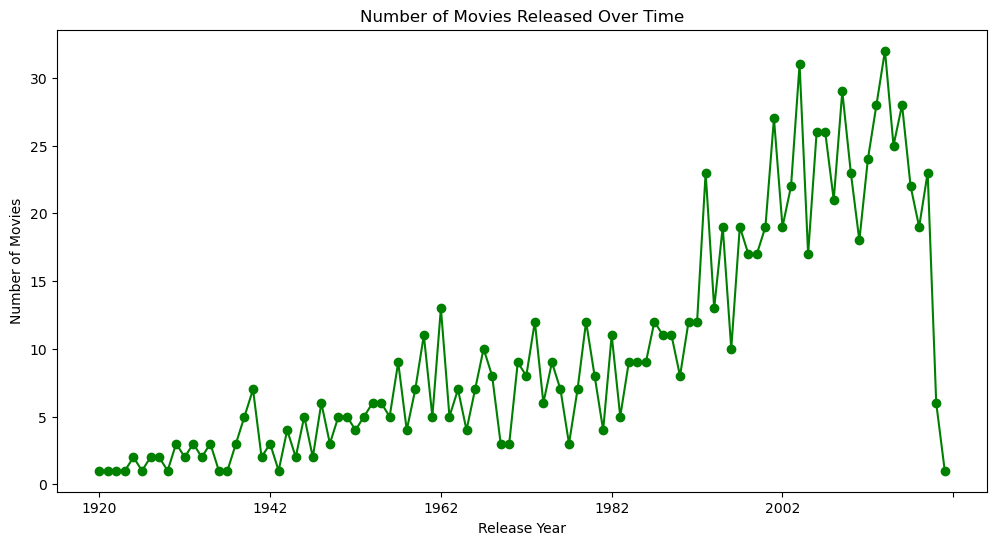

In [29]:
#Visualizing the Release Year Trends
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', marker='o', color='green')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

## Explore IMDb Trends Over Time
We can analyze the change in average ratings, number of movies released, or even the popularity of different genres to examine the evolution of IMDB trends.

In [31]:
#Analyzing the evolution of average ratings over time
avg_ratings_over_time = movies_df.groupby('Released_Year')['IMDB_Rating'].mean()

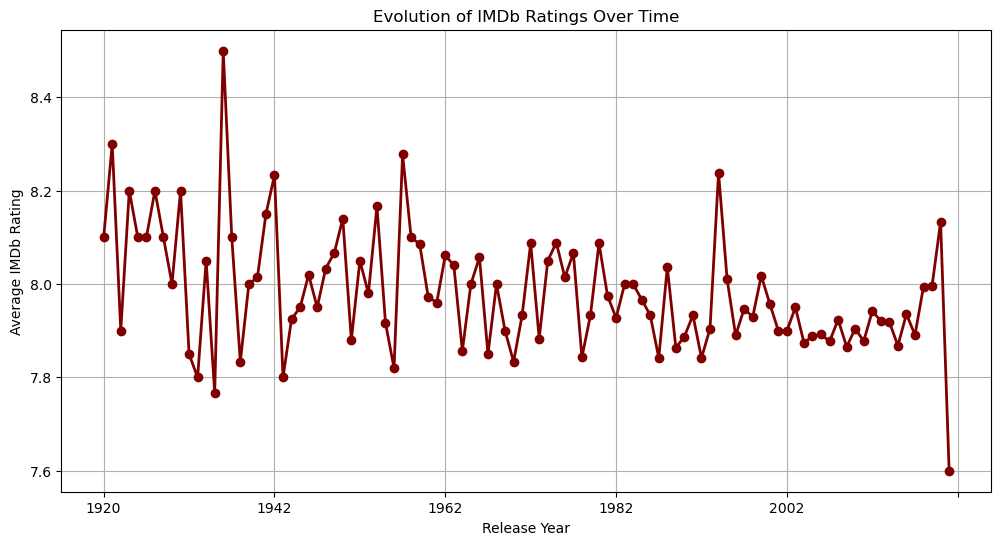

In [33]:
#Visualizing the evolution of IMDB Ratings over time
plt.figure(figsize=(12, 6))
avg_ratings_over_time.plot(kind='line', marker='o', color='maroon', linewidth=2)
plt.title('Evolution of IMDb Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()

# Correlation

## Correlation Matrix

In [72]:
# Include only numeric data
numeric_data = movies_df.select_dtypes(include = ['float', 'int'])

# Create  a correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
corr_matrix

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165807,-0.131053,-0.289270,0.241785,0.233250
Runtime,0.165807,1.000000,0.244112,-0.027747,0.173304,0.139104
IMDB_Rating,-0.131053,0.244112,1.000000,0.254000,0.495361,0.097490
Meta_score,-0.289270,-0.027747,0.254000,1.000000,-0.017741,-0.032424
No_of_Votes,0.241785,0.173304,0.495361,-0.017741,1.000000,0.574877
Gross,0.233250,0.139104,0.097490,-0.032424,0.574877,1.000000


## Correlation Heat Map

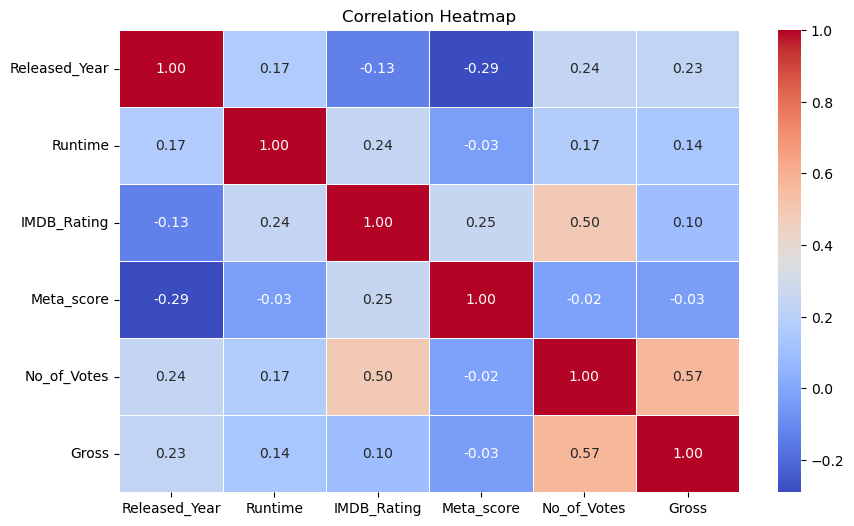

In [76]:
# Create a new figure with size 10*6 inches
plt.figure(figsize = (10,6))
# Plot the correlation heat map
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
# Add a title
plt.title('Correlation Heatmap')
# Plot the heat map
plt.show()

In [78]:
# Save your dataset to a CSV file
movies_df.to_csv('movies_dataset.csv', index=False)